# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Maurizio Fell

Datum: 17.11.2023

Gruppe: 25

## Forschungsfrage

In diesem Versuch wird die Wärmekapazitäts des hier verwendeten Behälters(Polypropylen) berechnet. 

Frage : Wo lässt sich die Wärmekapazität des Behälters einordnen?

## Versuchsaufbau und Durchführung

Man nehme zwei Messbecher und fülle sie jeweils mit 0.5l Wasser. Im kleineren Becher befindet sich heißes Wasser und im Großen kaltes Wasser. Die Sensoren werden eingetaucht und man wartet kurz, bis die Sensoren die aktuelle Temperatur der Becher gemessen haben. Dann füllt man das heiße Wasser in den großen Becher und misst nun die Temperatur des gemischten Bechers mit beiden Sensoren. Wenn die Temperaturen sich angegelichen haben wird der Versuch beendet. Danach berechnet man die Wärmekapazität des großen Bechers.


<img src="figures/Heat_Capacity_Versuch.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters



#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "data/heat_capacity/heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import json
import h5py
pathsens1 = "data/heat_capacity/sensor_1_1ee83a6f-bc37-65e9-89ed-ee6663466c1b.json"
pathsens2 = "data/heat_capacity/sensor_2_1ee83a70-66be-62bc-882d-6ad21c723eef.json"
with open(pathsens1) as f1:
    k1 = json.load(f1)
    sens1ID = k1["JSON"]["ID"]
with open(pathsens2) as f2:
    k2 = json.load(f2)
    sens2ID = k2["JSON"]["ID"]

IDlist = [sens1ID, sens2ID]
f3 = h5py.File(path, "r")
templist1 = []
templist2 = []
timelist1 = []
timelist2 = []
for i in IDlist:
    temp = list(f3["RawData"][i]["temperature"])
    time = list(f3["RawData"][i]["timestamp"])
    if i == sens1ID:
        templist1.extend(temp)
        timelist1.extend(time)
    if i == sens2ID:
        templist2.extend(temp)
        timelist2.extend(time)


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


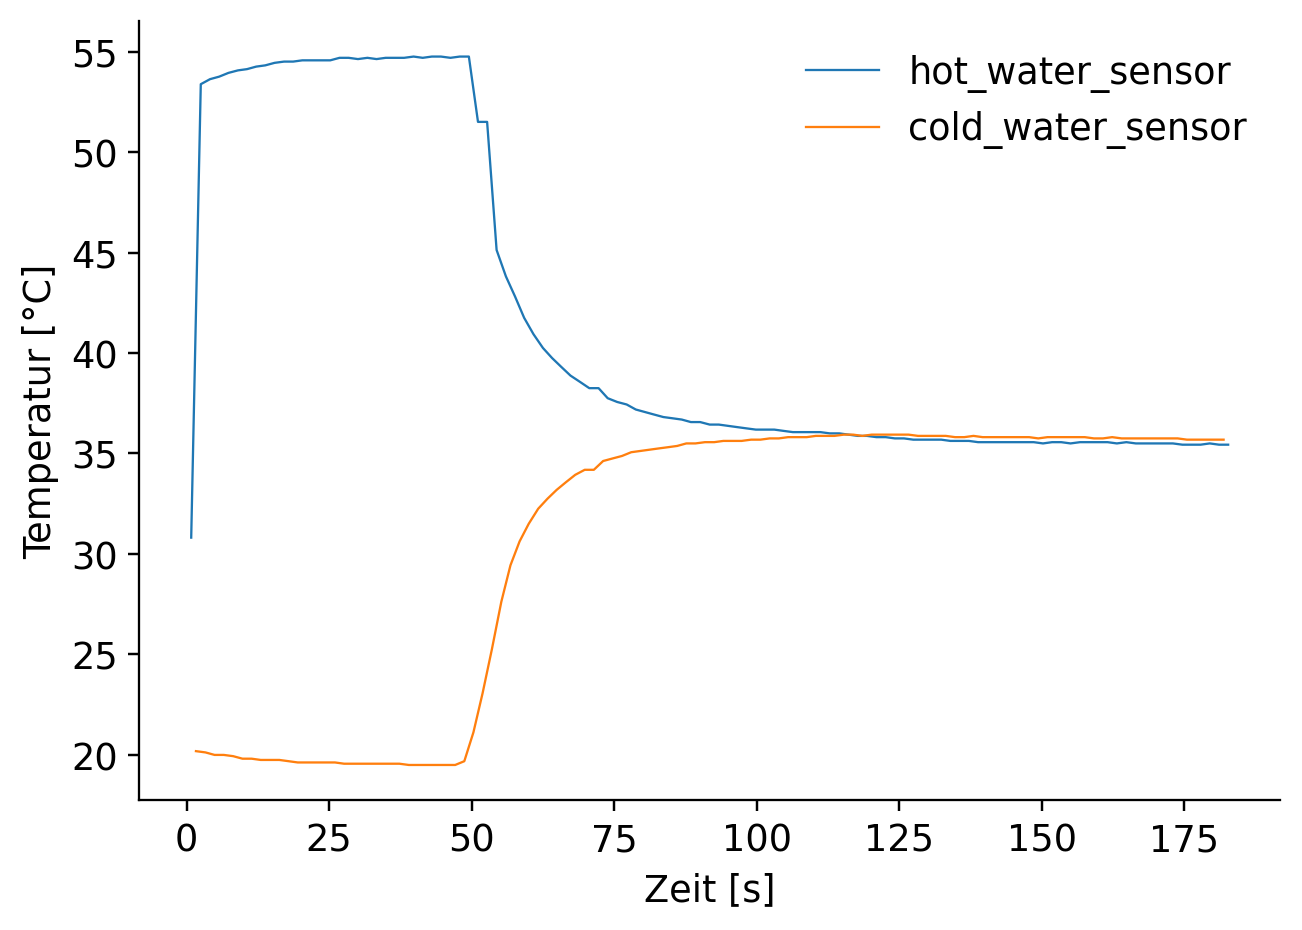

In [4]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(timelist1, templist1, color="tab:blue", label ="hot_water_sensor")
ax.plot(timelist2, templist2, color="tab:orange",  label ="cold_water_sensor")
ax.set_xlabel("Zeit [s]")
ax.set_ylabel("Temperatur [°C]")
ax.legend()

plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
pathmass = "data/heat_capacity/probe_heat_capacity_1ee83af5-bcd5-6f0f-ab77-d9c469f176d5.json"
with open(pathmass) as l:
    p = json.load(l)
    madd = p["probe"]["mass"]
mcup = madd
print(madd ,"kg")
print(mcup ,"kg")
# DONE #

0.5 kg
0.5 kg


#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
t2 = 0
t1 = 50
for i in range(111):
    tv = templist1[i]
    if tv > t2:
        t2 = tv
for ii in range(111):
    tvv = templist2[ii]
    if tvv < t1:
        t1 = tvv
tm = (templist2[111] + templist1[111])*(1/2)
print("t2 = ",t2, "°C")
print("t1 = ",t1, "°C")
print("tm = ",tm, "°C")
# DONE #

t2 =  54.75 °C
t1 =  19.5 °C
tm =  35.5625 °C


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
c = (float(madd)*water_heat_capa*(float(t2-tm)))/(float(tm-t1)) - float(mcup)*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result

print("Wärmekapazität des Kalorimeter:",c , "kJ/K")
# DONE #

Wärmekapazität des Kalorimeter: 0.40661478599221823 kJ/K


## Diskussion

Der Stoff(Polypropylen) aus dem der Becher(Kalorimeter) besteht hat eine Wärmekapazität von etwa 0.407 kJ/K. Will man den Becher um 1K erhitzen, so muss man ihm 407 Joule Enegerie zuführen. Der Becher wiegt etwa 0.2kg, womit die spezifische Wärmekapaziät etwa 2 kJ/kgK beträgt. Man muss also 2 kJ Energie zugeben, um 1kg des Stoffes um 1 K zu erhitzen. Diese Wärmekapazität ist gering im Vergleich zu der von Wasser (4.18 kJ/kgK), für welches man etwa das 2 fache an Energie aufwenden muss, um 1kg um 1 K zu erhitzen. Die Wärmekapazität des Behälters lässt sich zwischen Styropor(1200 kJ/kgK) und Eis(2100 kJ/kgK) einordnen. Man beachte, dass die Sensoren eine Ungenauigkeit von 0.5°C haben, wodurch das Ergebnis leicht abweichen könnte.

## Fazit

Der Versuch hat mir ein besseres Verständnis der Wärmekapazität gegeben und es mir ermöglicht verschiedene Wärmekapazitäten von unterschiedlichen Stoffen in Relation zu setzen. Des Weiteren habe ich gelernt wie man HDF5 Files anlegt und ausliest und wie man mit json Strukturen umgeht. 